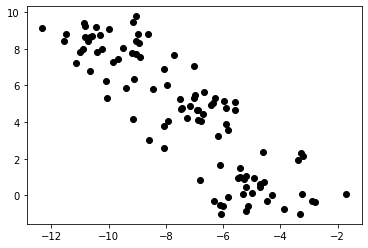

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
%precision 3
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X, _ = make_blobs(random_state=12)

plt.scatter(X[:,0], X[:,1],color='black')

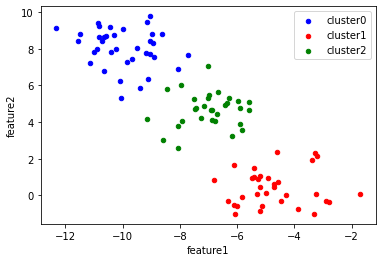

In [24]:
kmeans = KMeans(init='random', n_clusters=3)

kmeans.fit(X)

y_pred = kmeans.predict(X)
merge_data = pd.concat([pd.DataFrame(X[:,0]), pd.DataFrame(X[:,1]), pd.DataFrame(y_pred)], axis=1)

merge_data.columns = ['feature1','feature2','cluster']

ax = None
colors = ['blue', 'red', 'green']
for i, data in merge_data.groupby('cluster'):
    ax = data.plot.scatter(x='feature1', y='feature2', color=colors[i],
                          label=f'cluster{i}', ax=ax)

In [25]:
merge_data

,feature1,feature2,cluster
0,-10.064160,5.336130,0
1,-10.914146,7.993395,0
2,-4.282810,0.033378,1
3,-8.943071,8.346425,0
4,-5.580912,5.119659,2
...,...,...,...
95,-7.170647,4.874246,2
96,-1.692013,0.048707,1
97,-10.226210,7.979062,0
98,-6.360683,5.023713,2


In [26]:
import requests, zipfile
import io

zip_file_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip'

r = requests.get(zip_file_url,stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [27]:
bank = pd.read_csv('bank-full.csv', sep=';')

bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [28]:
print('데이터 형식(X, Y) : {}'.format(bank.shape))
print('결측 값 수 : {}'.format(bank.isnull().sum().sum()))

데이터 형식(X, Y) : (45211, 17)
결측 값 수 : 0


In [35]:
from sklearn.preprocessing import StandardScaler

bank_sub = bank[['age','balance','campaign','previous']]

sc = StandardScaler()
sc.fit(bank_sub)
bank_sub_std = sc.transform(bank_sub)
bank_sub_std

array([[ 1.607,  0.256, -0.569, -0.252],
       [ 0.289, -0.438, -0.569, -0.252],
       [-0.747, -0.447, -0.569, -0.252],
       ...,
       [ 2.925,  1.43 ,  0.722,  1.05 ],
       [ 1.513, -0.228,  0.399, -0.252],
       [-0.371,  0.528, -0.247,  4.524]])

0     1283
1     4499
2     1370
3    14175
4      824
5    23060
Name: cluster_number, dtype: int64


Text(0, 0.5, 'count')

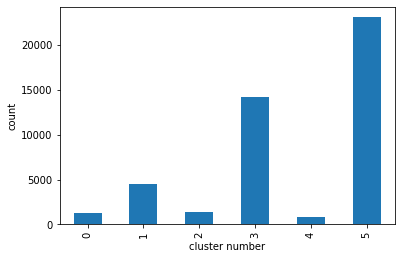

In [37]:
kmeans = KMeans(init='random', n_clusters=6, random_state=12)
kmeans.fit(bank_sub_std)

labels = pd.Series(kmeans.labels_,name='cluster_number')
print(labels.value_counts(sort=False))
ax = labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')

Text(0, 0.5, 'Distortion')

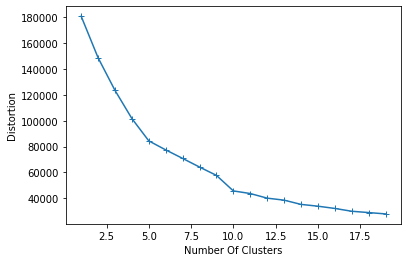

In [43]:
#elbow
dist_list = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init='random', random_state = 12)
    kmeans.fit(bank_sub_std)
    dist_list.append(kmeans.inertia_)

plt.plot(range(1,20), dist_list, marker='+')
plt.xlabel('Number Of Clusters')
plt.ylabel('Distortion')

In [44]:
bank_with_cluster = pd.concat([bank, labels], axis=1)

bank_with_cluster.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,cluster_number
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,3
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,3
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,5
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,3
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,5


In [52]:
bins = [15,20,25,30,35,40,45,50,55,60,65,100]
qcut_age = pd.cut(bank_with_cluster.age, bins, right=False)

df = pd.concat([bank_with_cluster.cluster_number, qcut_age], axis=1)

cross_cluster_age = df.groupby(['cluster_number', 'age']).size().unstack().fillna(0)
cross_cluster_age

age,"[15, 20)","[20, 25)","[25, 30)","[30, 35)","[35, 40)","[40, 45)","[45, 50)","[50, 55)","[55, 60)","[60, 65)","[65, 100)"
cluster_number,,,,,,,,,,,
0,0,11,74,241,219,203,156,140,155,48,36
1,1,26,216,976,932,1127,668,350,170,29,4
2,0,20,126,327,306,186,145,117,71,38,34
3,0,0,0,0,0,918,4400,3803,3469,850,735
4,1,6,80,194,165,132,101,78,57,9,1
5,45,699,3968,8002,6727,3619,0,0,0,0,0


<AxesSubplot:xlabel='age', ylabel='cluster_number'>

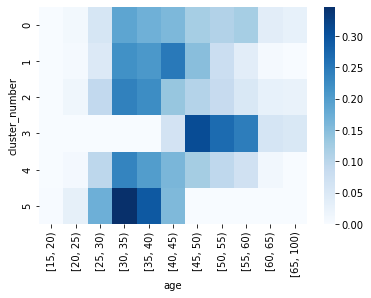

In [60]:
hist_age = pd.value_counts(qcut_age)
hist_age
sns.heatmap(cross_cluster_age.apply(lambda x : x / x.sum(), axis=1), cmap='Blues')

In [62]:
cross_cluster_job = bank_with_cluster.groupby(['cluster_number', 'job']).size().unstack().fillna(0)
cross_cluster_job

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
cluster_number,,,,,,,,,,,,
0,109,175,54,36,417,77,71,69,22,193,49,11
1,461,1017,173,132,1050,67,167,420,46,821,112,33
2,193,238,42,21,334,53,42,112,53,244,33,5
3,1384,2844,522,641,2676,1999,464,1055,3,2009,426,152
4,83,189,21,18,178,15,34,72,8,182,12,12
5,2941,5269,675,392,4803,53,801,2426,806,4148,671,75


<AxesSubplot:xlabel='job', ylabel='cluster_number'>

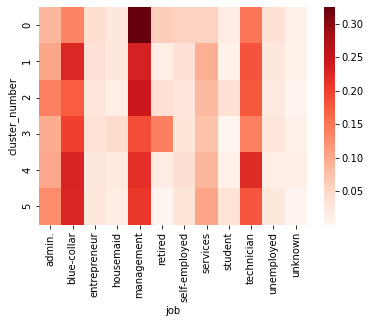

In [63]:
sns.heatmap(cross_cluster_job.apply(lambda x : x / x.sum(), axis=1), cmap='Reds')